Loading the dataset from a csv file and printing it 

In [35]:
Boston <- read.table("../Data/bostonHousing.csv", header = TRUE, sep = ",")
print(Boston)

        crim    zn indus chas    nox    rm   age     dis rad tax ptratio      b
1    0.00632  18.0  2.31    0 0.5380 6.575  65.2  4.0900   1 296    15.3 396.90
2    0.02731   0.0  7.07    0 0.4690 6.421  78.9  4.9671   2 242    17.8 396.90
3    0.02729   0.0  7.07    0 0.4690 7.185  61.1  4.9671   2 242    17.8 392.83
4    0.03237   0.0  2.18    0 0.4580 6.998  45.8  6.0622   3 222    18.7 394.63
5    0.06905   0.0  2.18    0 0.4580 7.147  54.2  6.0622   3 222    18.7 396.90
6    0.02985   0.0  2.18    0 0.4580 6.430  58.7  6.0622   3 222    18.7 394.12
7    0.08829  12.5  7.87    0 0.5240 6.012  66.6  5.5605   5 311    15.2 395.60
8    0.14455  12.5  7.87    0 0.5240 6.172  96.1  5.9505   5 311    15.2 396.90
9    0.21124  12.5  7.87    0 0.5240 5.631 100.0  6.0821   5 311    15.2 386.63
10   0.17004  12.5  7.87    0 0.5240 6.004  85.9  6.5921   5 311    15.2 386.71
11   0.22489  12.5  7.87    0 0.5240 6.377  94.3  6.3467   5 311    15.2 392.52
12   0.11747  12.5  7.87    0 0.5240 6.0

Printing the type of each column

In [36]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


Dividing the data into two sets 400 example for training and 107 for testing.

In [37]:
total_data_points <- nrow(Boston)
training_size <- 400
testing_size <- 107
training_index <- sample(1:total_data_points, size = training_size)
training_data <- Boston[training_index, ]
testing_data <- Boston[-training_index, ]

We need to create a linear model to verify that there is a relation between age and medv

In [38]:
model1 <- lm(medv ~ age, data = training_data)
summary(model1)


Call:
lm(formula = medv ~ age, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.507  -5.426  -2.241   2.616  30.824 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.02644    1.16347  26.667  < 2e-16 ***
age         -0.11850    0.01579  -7.504 4.09e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.88 on 398 degrees of freedom
Multiple R-squared:  0.1239,	Adjusted R-squared:  0.1217 
F-statistic: 56.31 on 1 and 398 DF,  p-value: 4.092e-13


From the above results we can deduce that there is a negative linear relation between the age and medv
with a parameter equal to **-0.119**.

Plotting the point for x=age,y=medv

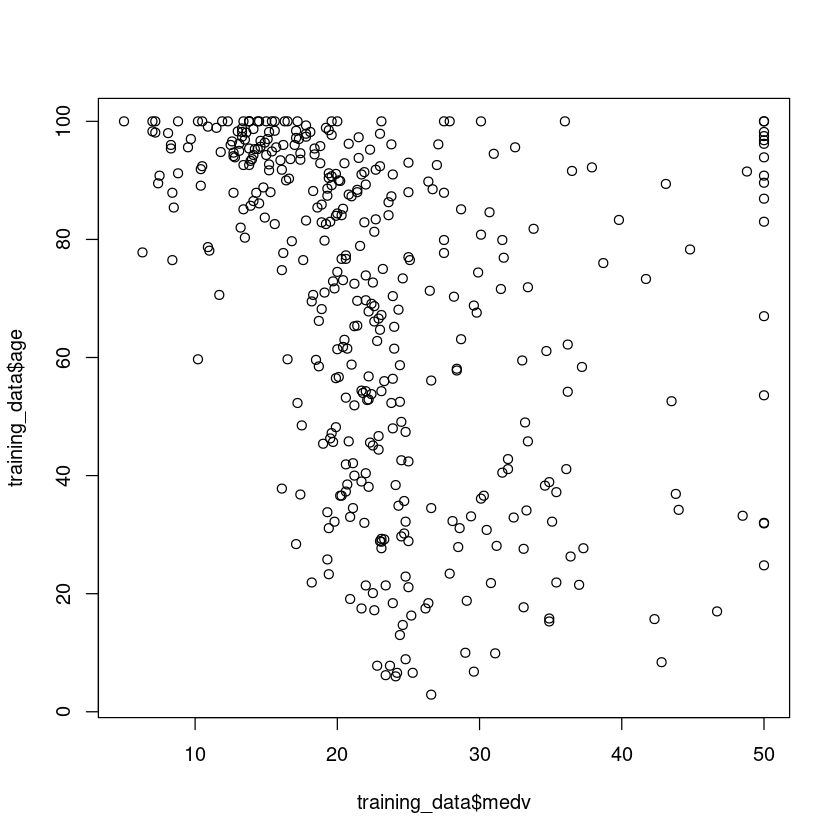

In [39]:
plot(training_data$medv, training_data$age)

We gonna repeat the same process for the lstat and medv

In [40]:
model2 <- lm(medv ~ lstat, data = training_data)
summary(model2)


Call:
lm(formula = medv ~ lstat, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.250  -4.252  -1.331   1.985  24.176 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.26093    0.63578   55.46   <2e-16 ***
lstat       -0.99024    0.04439  -22.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.325 on 398 degrees of freedom
Multiple R-squared:  0.5556,	Adjusted R-squared:  0.5545 
F-statistic: 497.6 on 1 and 398 DF,  p-value: < 2.2e-16


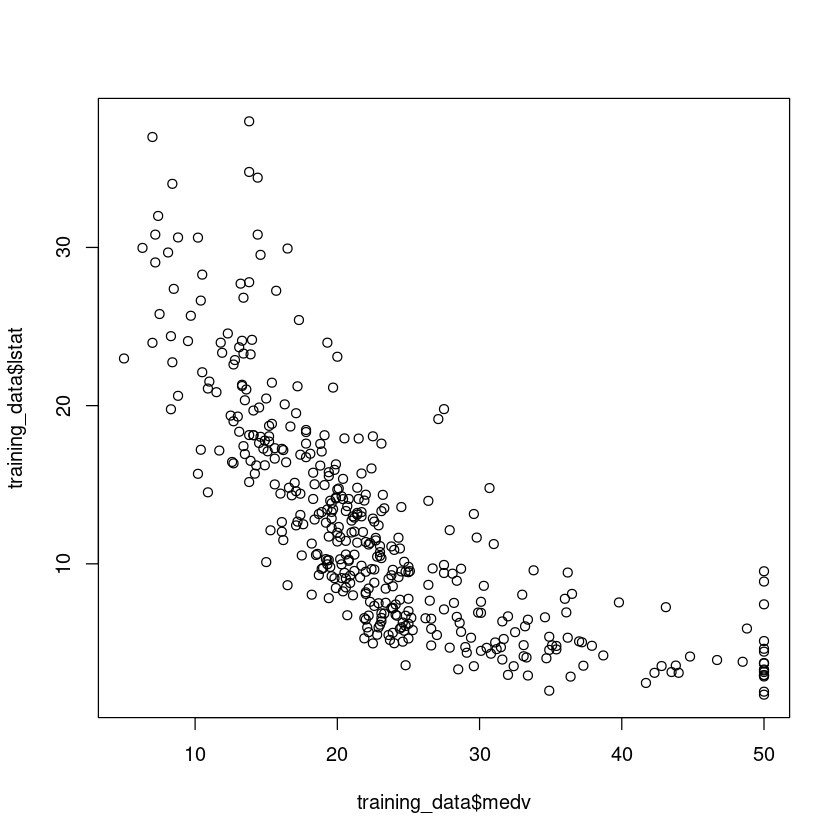

In [41]:
plot(training_data$medv, training_data$lstat)

Here we can see a medv has polynomial negative relation with lstat with parameter equal to **-0.90724**

We plot the regression line using both lstat and age features

In [45]:
model3<-lm_fit <- lm(medv ~ lstat + age, data = training_data)